In [1]:
import warnings
import scanpy as sc
import anndata as an
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from urllib import request
import scanorama
import os

sc.settings.set_figure_params(dpi=70)
# sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.logging.print_header()
sc.settings.verbosity = 3

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.1 pandas==1.4.2 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.9.9 louvain==0.7.1 pynndescent==0.5.7


In [2]:
ad_smart = sc.read_h5ad('./results/single_cell/single_cell_smartseq2_qc.h5ad')
ad_10x = sc.read_h5ad('./results/single_cell/single_cell_10X.h5ad')

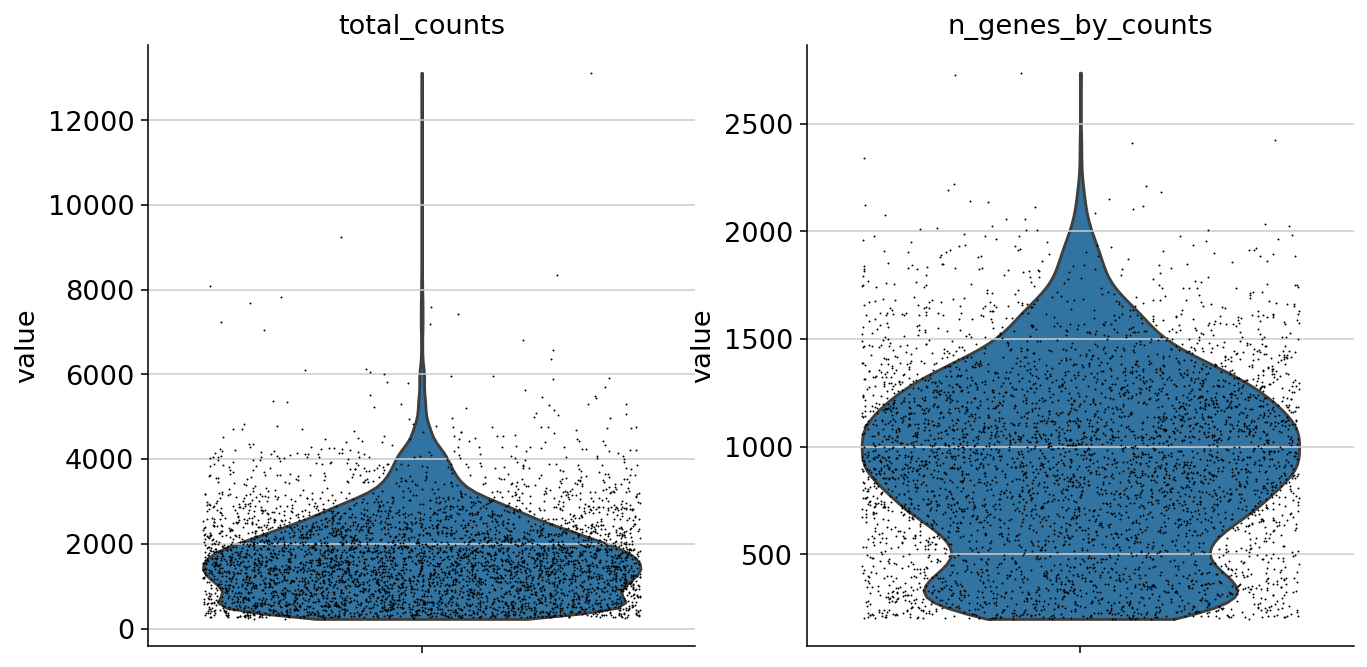

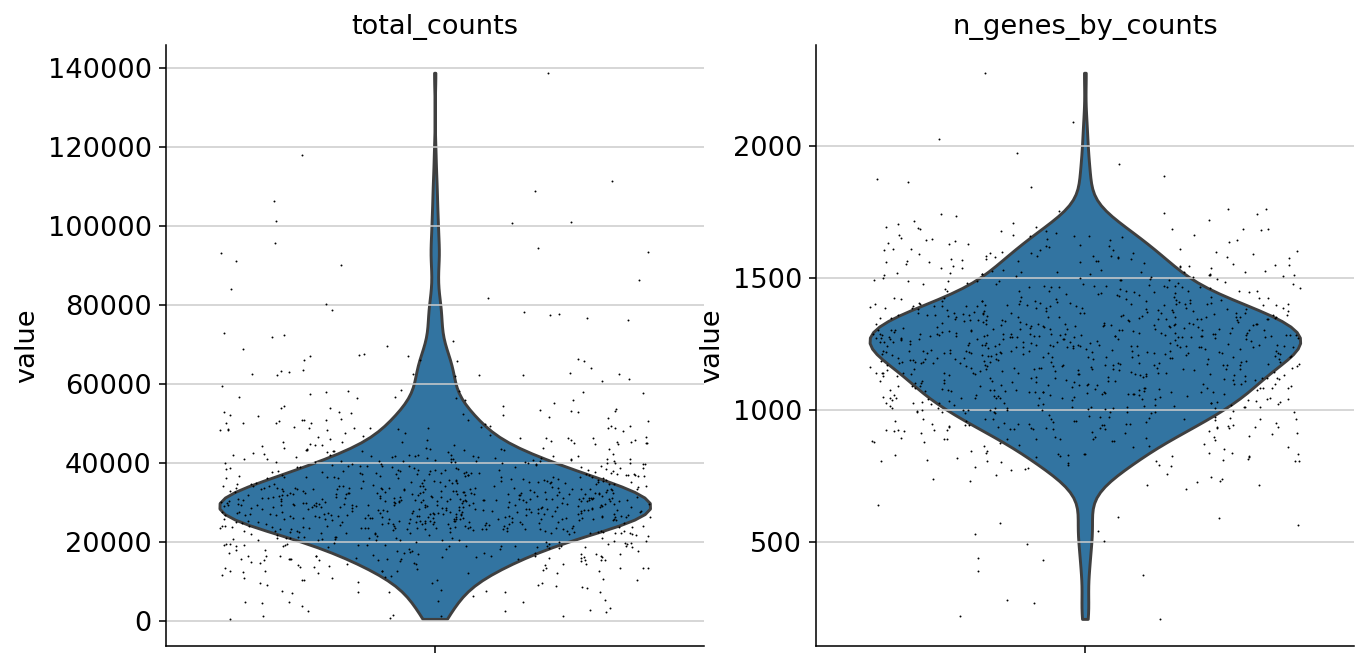

In [3]:
sc.pl.violin(ad_10x, keys = ['total_counts', 'n_genes_by_counts'], jitter=0.4, rotation= 45, multi_panel=True)
sc.pl.violin(ad_smart, keys = ['total_counts', 'n_genes_by_counts'], jitter=0.4, rotation= 45, multi_panel=True)

In [4]:
ad_smart.obs['batch'] = 'SS2'
ad_10x.obs['batch'] = '10X'

In [5]:
ad_smart

AnnData object with n_obs × n_vars = 916 × 5142
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'louvain_0.4', 'leiden_0.4', 'louvain_0.6', 'leiden_0.6', 'louvain_0.8', 'leiden_0.8', 'louvain_0.9', 'leiden_0.9', 'louvain_1.0', 'leiden_1.0', 'louvain_1.1', 'leiden_1.1', 'louvain_1.2', 'leiden_1.2', 'louvain_1.4', 'leiden_1.4', 'louvain_1.6', 'leiden_1.6', 'clusters', 'day', 'batch'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mal_rna', 'hb'
    uns: 'clusters_colors', 'day_colors', 'dendrogram_clusters', 'hvg', 'leiden', 'leiden_0.4_colors', 'leiden_0.6_colors', 'leiden_0.8_colors', 'leiden_0.9_colors', 'leiden_1.0_colors', 'leiden_1.1_colors', 'leiden_1.2_colors', 'leiden_1.4_colors', 'leiden_1.6_colors', 'log1p', 'louvain', 'louvain_0.4_colors', 'louvain_0.6_colors', 'louvain_0.8_colors', 'louvain_0.9_colors', 'louvain_1.0_colors', 'louvain_1.1_colors', 'louvain_1.2_colo

In [6]:
adatas = [ad_smart, ad_10x]
adatas_cor = scanorama.correct_scanpy(adatas, return_dimred=True)

Found 4937 genes among all datasets
[[0.         0.58078603]
 [0.         0.        ]]
Processing datasets (0, 1)


/home/mubasher/.conda/envs/spatial/lib/python3.9/site-packages/scanorama/scanorama.py:237: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(datasets[i])


In [7]:
scanorama.integrate_scanpy(
    adatas        = adatas_cor,
    dimred        = 50)

Found 4937 genes among all datasets
[[0.         0.71834061]
 [0.         0.        ]]
Processing datasets (0, 1)


In [8]:
adatas_cor[0]

AnnData object with n_obs × n_vars = 916 × 4937
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'louvain_0.4', 'leiden_0.4', 'louvain_0.6', 'leiden_0.6', 'louvain_0.8', 'leiden_0.8', 'louvain_0.9', 'leiden_0.9', 'louvain_1.0', 'leiden_1.0', 'louvain_1.1', 'leiden_1.1', 'louvain_1.2', 'leiden_1.2', 'louvain_1.4', 'leiden_1.4', 'louvain_1.6', 'leiden_1.6', 'clusters', 'day', 'batch'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mal_rna', 'hb'
    uns: 'clusters_colors', 'day_colors', 'dendrogram_clusters', 'hvg', 'leiden', 'leiden_0.4_colors', 'leiden_0.6_colors', 'leiden_0.8_colors', 'leiden_0.9_colors', 'leiden_1.0_colors', 'leiden_1.1_colors', 'leiden_1.2_colors', 'leiden_1.4_colors', 'leiden_1.6_colors', 'log1p', 'louvain', 'louvain_0.4_colors', 'louvain_0.6_colors', 'louvain_0.8_colors', 'louvain_0.9_colors', 'louvain_1.0_colors', 'louvain_1.1_colors', 'louvain_1.2_colo

In [9]:
adata_all = sc.concat(
    adatas_cor,
    label="batch",
    uns_merge="unique",
    keys=["SS2", "10X"],
    
)

computing PCA
    with n_comps=50
    finished (0:00:24)


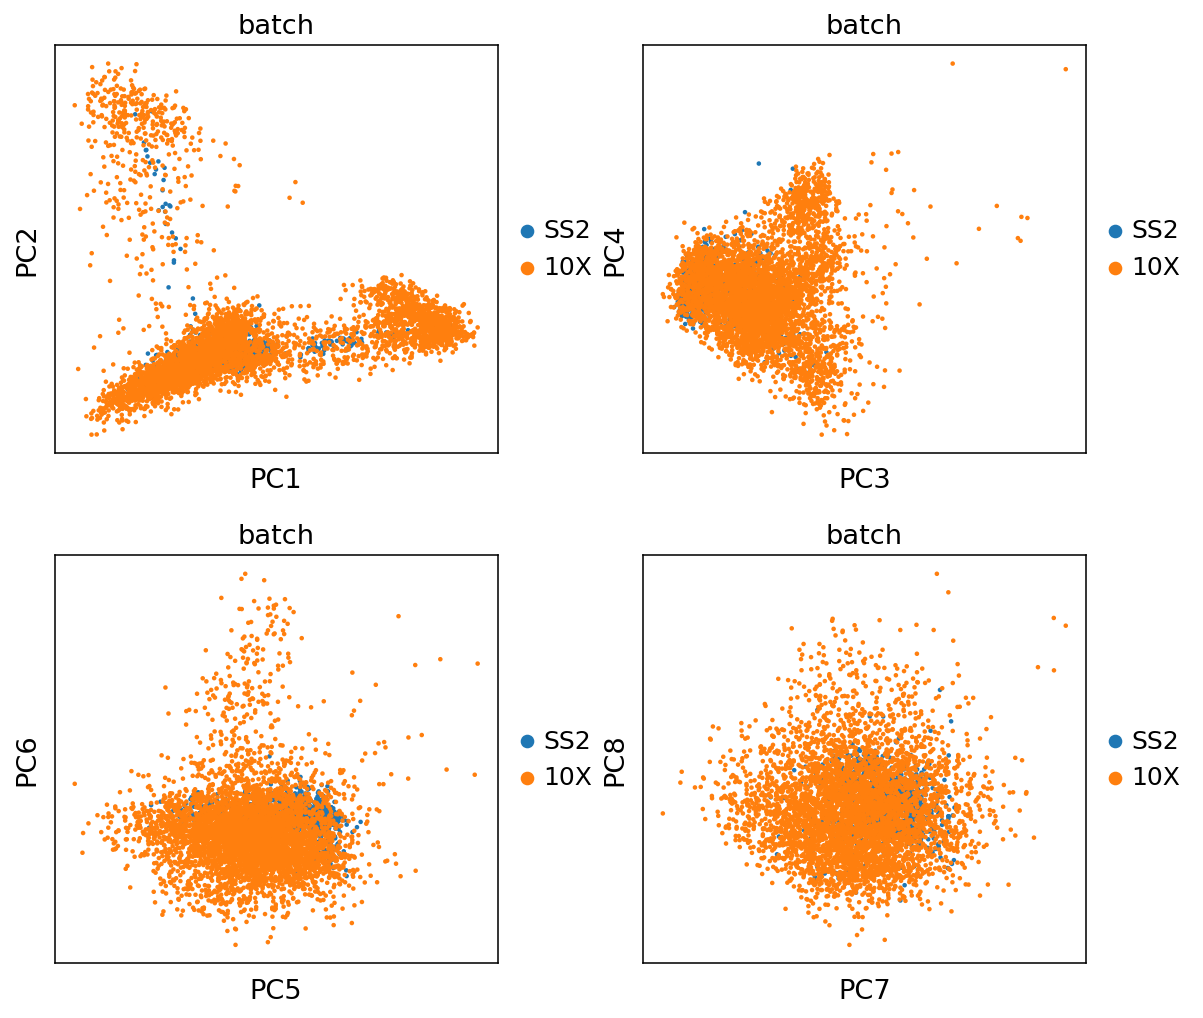

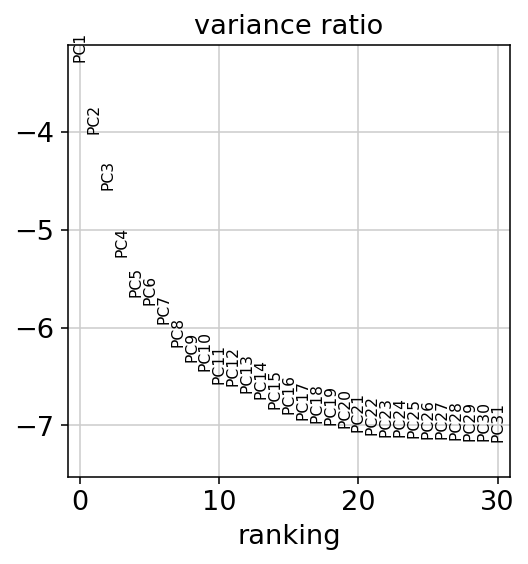

In [10]:
sc.tl.pca(adata_all, svd_solver = 'arpack', use_highly_variable = False)
sc.pl.pca(adata_all, components = ['1,2','3,4','5,6','7,8'], ncols=2, color='batch')
sc.pl.pca_variance_ratio(adata_all, log=True)

In [11]:
adata_all

AnnData object with n_obs × n_vars = 5471 × 4937
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'louvain_0.4', 'leiden_0.4', 'louvain_0.6', 'leiden_0.6', 'louvain_0.8', 'leiden_0.8', 'louvain_0.9', 'leiden_0.9', 'louvain_1.0', 'leiden_1.0', 'louvain_1.1', 'leiden_1.1', 'louvain_1.2', 'leiden_1.2', 'louvain_1.4', 'leiden_1.4', 'louvain_1.6', 'leiden_1.6', 'batch'
    uns: 'clusters_colors', 'day_colors', 'dendrogram_clusters', 'hvg', 'leiden', 'louvain', 'neighbors', 'pca', 'wilcoxon', 'batch_colors'
    obsm: 'X_pca', 'X_umap', 'X_scanorama'
    varm: 'PCs'

In [12]:
sc.pp.neighbors(adata_all, n_pcs = 10, n_neighbors = 10 ,use_rep="X_scanorama")
sc.tl.umap(adata_all,n_components= 3, min_dist=0.3,spread=0.4,maxiter=150)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)


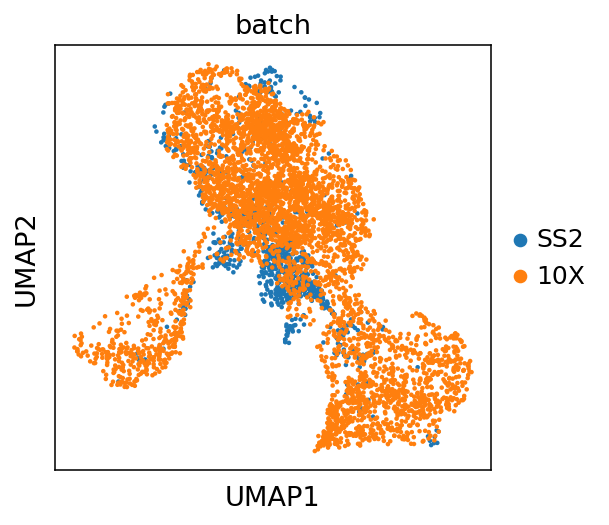

In [13]:
sc.pl.umap(adata_all, color='batch')

In [14]:
resolutions = [0.4,0.6,0.8,0.9,1.0,1.1,1.2,1.4,1.6]

In [15]:
for i in resolutions:
    sc.tl.louvain( adata_all, resolution = i, key_added = "louvain_"+str(i) )
    sc.tl.leiden(  adata_all, resolution = i, key_added = "leiden_"+str(i) )

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 10 clusters and added
    'louvain_0.4', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 12 clusters and added
    'leiden_0.4', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 12 clusters and added
    'louvain_0.6', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 14 clusters and added
    'leiden_0.6', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 13 clusters and added
    'louvain_0.8', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 15 clusters and added
    'leiden_0.8', the cluster labels (adata.obs, categorical) (0:00:00)
running Lo

In [16]:
all_clusterings = [ ('louvain_'+str(i)) for i in resolutions] + [ ('leiden_'+str(i)) for i in resolutions ]

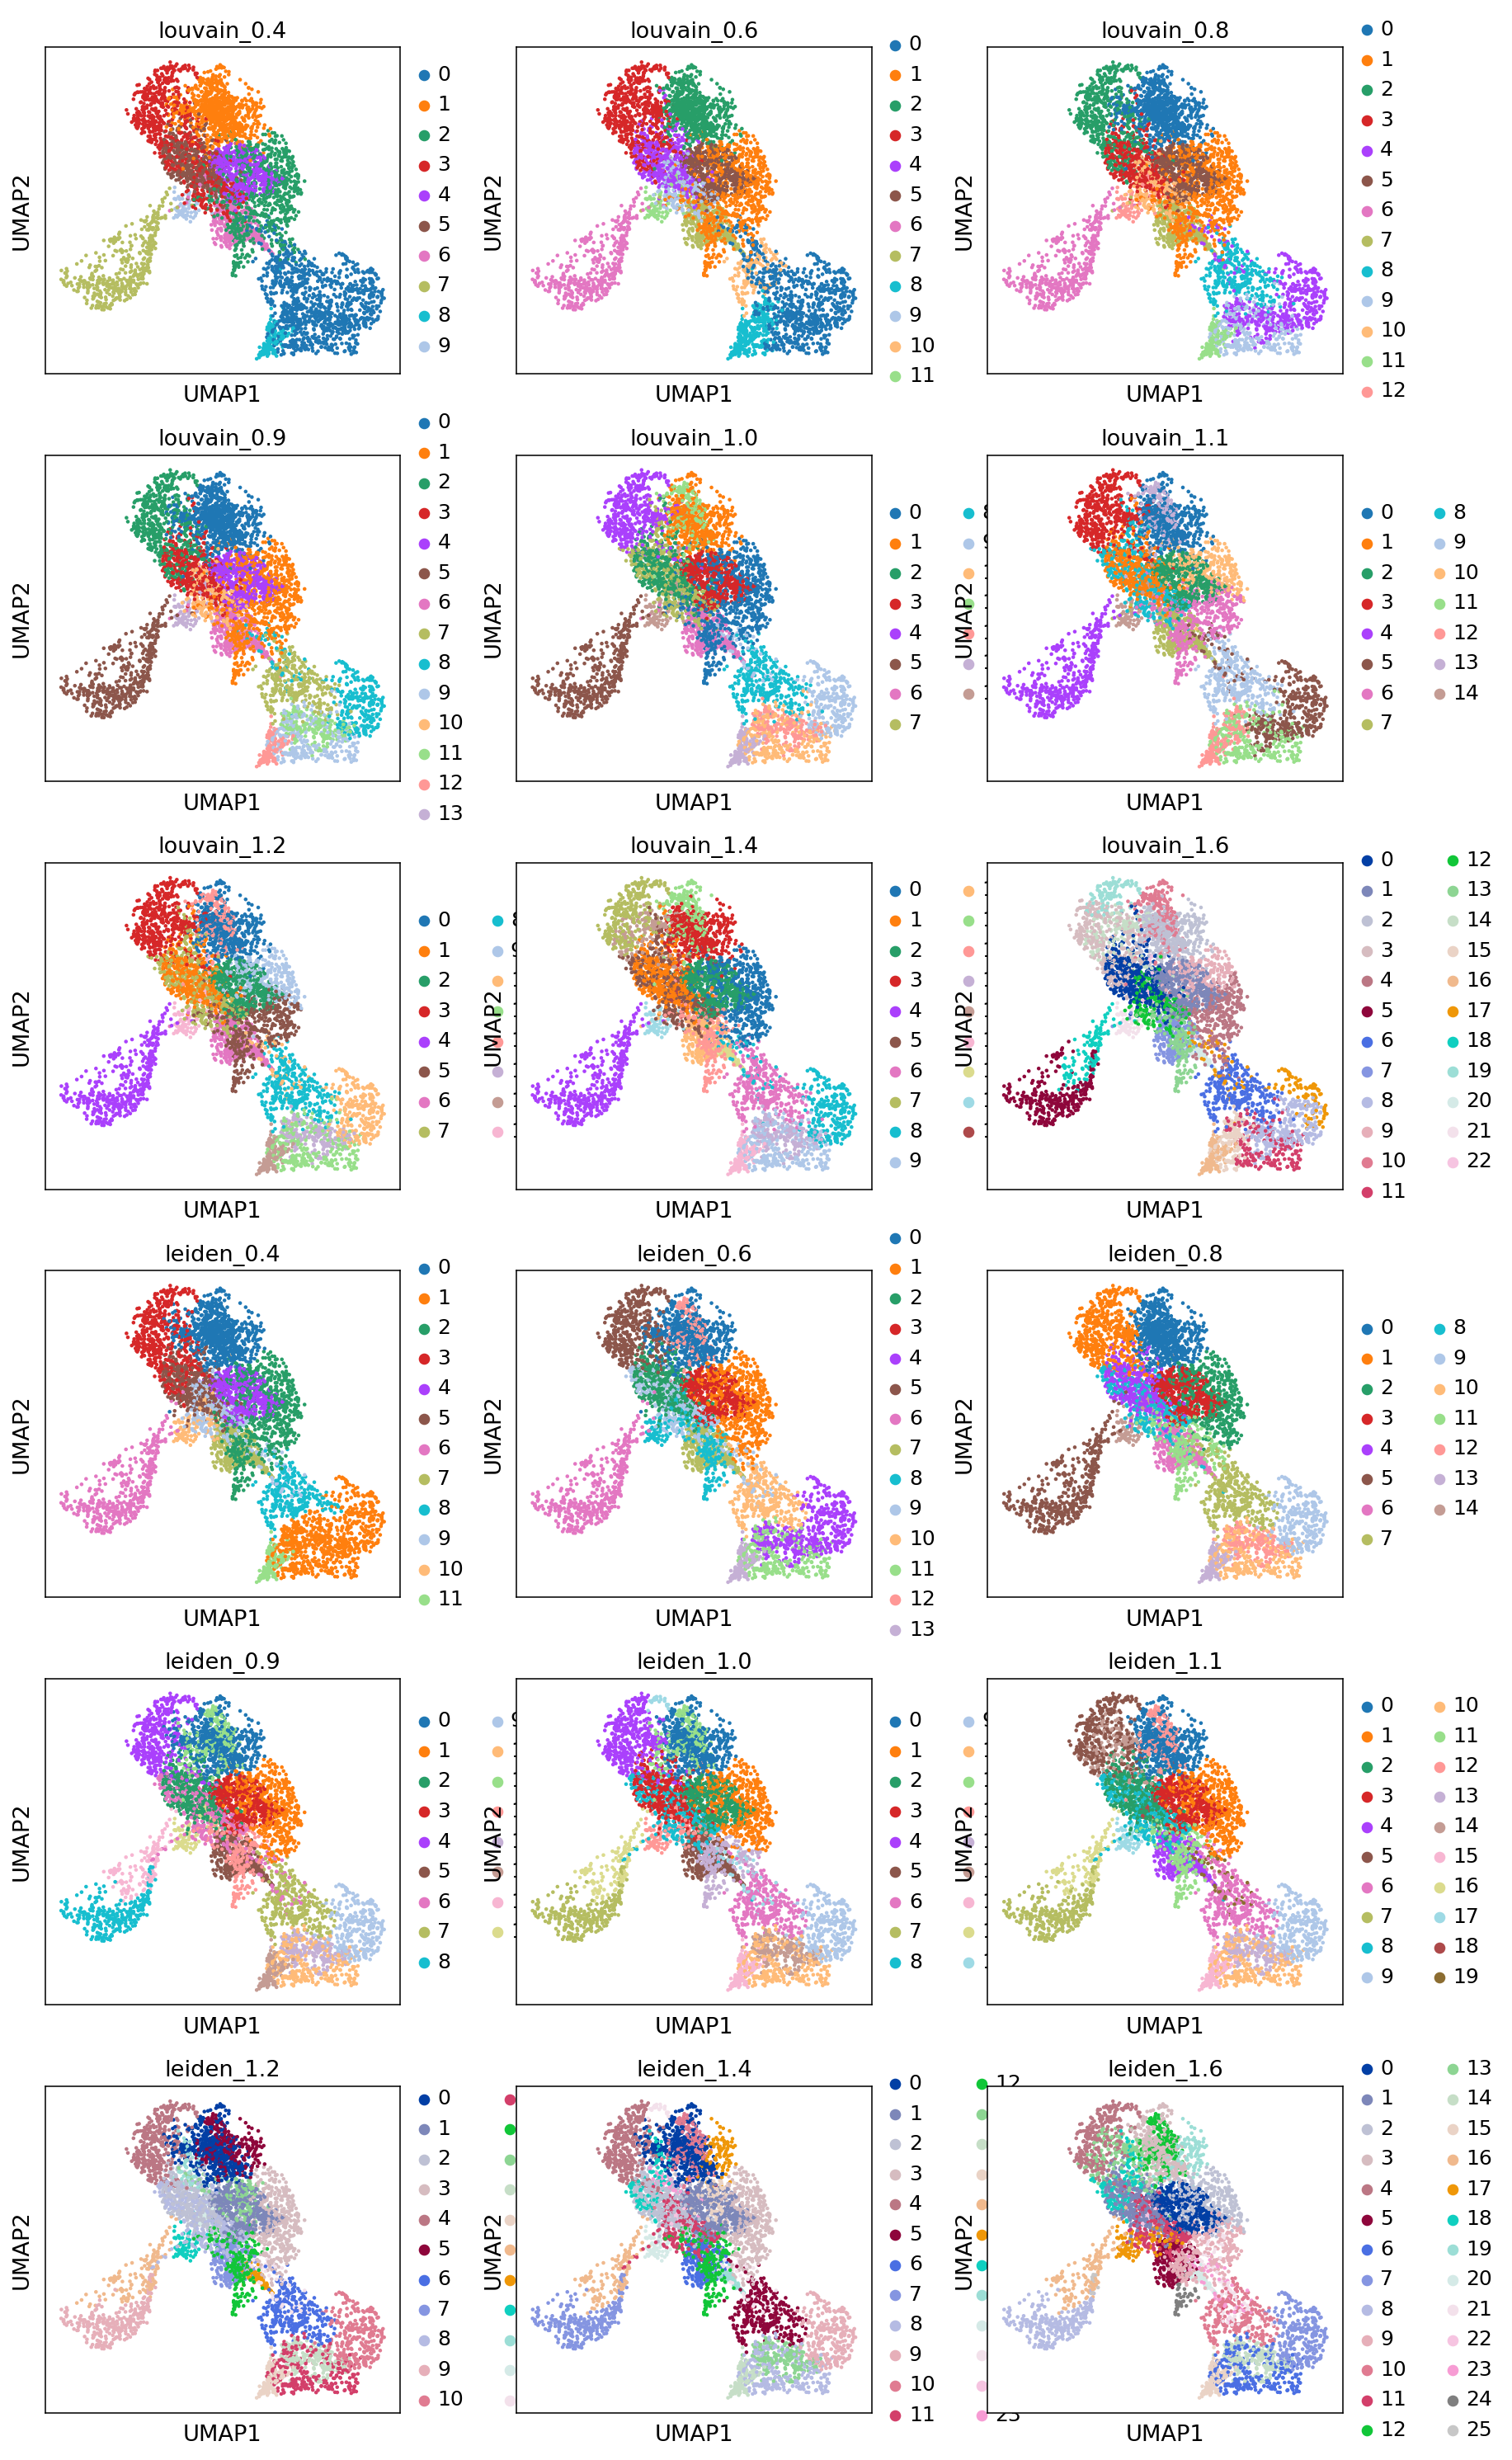

In [17]:
sc.pl.umap(adata = adata_all, color=all_clusterings , ncols=3 )

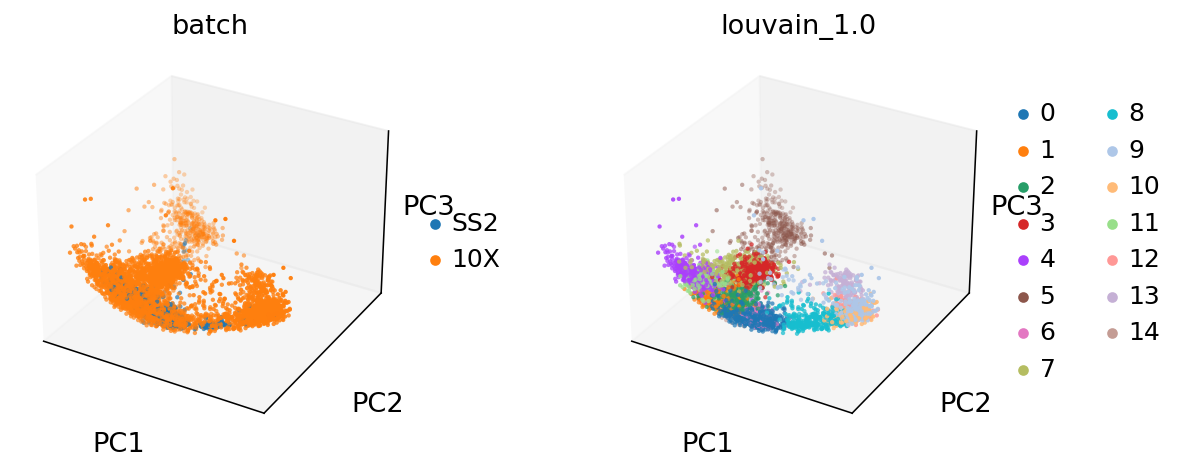

In [18]:
sc.pl.pca(adata_all, ncols=2, color=['batch', 'louvain_1.0'], projection = '3d')

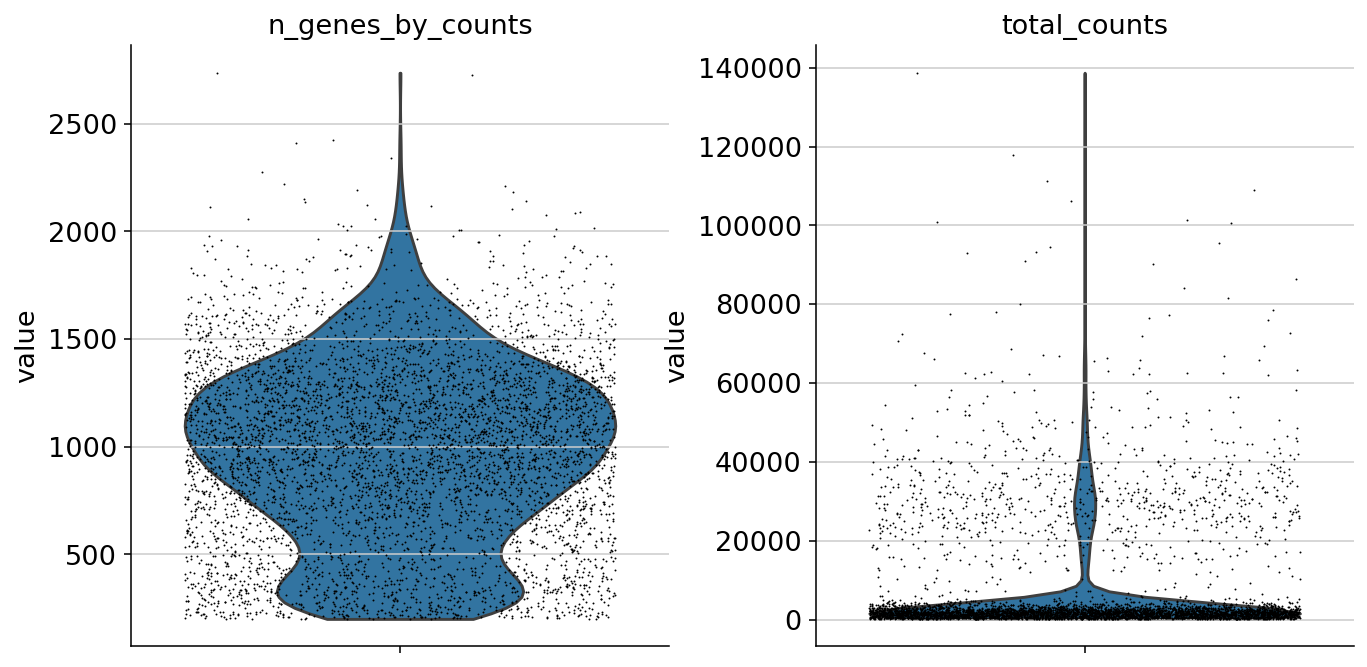

In [19]:
variables = ['n_genes_by_counts', 'total_counts']
sc.pl.violin(adata_all, keys=variables, jitter=0.4, rotation= 45, multi_panel=True)

In [ ]:
os.makedirs('./results/single_cell', exist_ok=True)
adata_all.write_h5ad('./results/single_cell/integrated_dataset_SS2_10X.h5ad')

In [ ]:
int_adata = sc.read_h5ad('./results/single_cell/integrated_dataset_SS2_10X.h5ad')

In [ ]:
meta_data = adata.obs.copy()
meta_data.to_csv("./files/meta.data_SS2.csv", sep=";")